<a href="https://colab.research.google.com/github/Xeena2812/deep-learning-nhf/blob/main/small_heart_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
import requests
import cv2

**Heart MRI Superresolution**

Preprocessing the data

For this project we are using the dataset of the 2017 ACDC challenge, which was created for segmentation, so it was needed to do some pre-processing.

The dataset contains 4D (3D+time) .nii files of full MRIs, that contain not only the heath but much more. 

We have located the heart in each Mri and fit it into 96 by 96 pixel png-s. We do this to reduce training time and to focus only on the heart. Since we only checked the first frames of the 4D images, the dataset becomes a bit dirty, but in most images the heart is in the same position troughout the layers and time. We also show some examples and how they look whith thier resolution downscaled.

There are in total 150 images, 100 intended for training and 50 intended for testing. 


*   Our trainig dataset contains 24889 pictures
*   Our testing dataset contains 12995 pictures

In [2]:
import gdown #Downloading the validation and testing dataset from our own Google drive

url = 'https://drive.google.com/u/0/uc?id=1JWt9FmzztHiDVlAp5-wWgPKCJRHoCEET&export=download'
output = 'train_valid.zip'
gdown.download(url, output, quiet=False)
url = 'https://drive.google.com/u/0/uc?id=1EbAI2qplPmukTwKVF7ntMtQP6ScYWLqF&export=download'
output = 'testing.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1JWt9FmzztHiDVlAp5-wWgPKCJRHoCEET&export=download
To: /content/train_valid.zip
100%|██████████| 165M/165M [00:00<00:00, 230MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1EbAI2qplPmukTwKVF7ntMtQP6ScYWLqF&export=download
To: /content/testing.zip
100%|██████████| 80.9M/80.9M [00:01<00:00, 76.1MB/s]


'testing.zip'

In [3]:
os.mkdir('train_valid')#Creating the directories
os.mkdir('testing')

In [4]:
import zipfile #Unzipping the pictures
import gzip
import shutil

with zipfile.ZipFile('train_valid.zip', 'r') as zip_ref:
    zip_ref.extractall('train_valid')
with zipfile.ZipFile('testing.zip', 'r') as zip_ref:
    zip_ref.extractall('testing')

In [5]:
test=[]#Loading the datasets into arrays
valid=[]

for i in range(0,12995):
  test.append(cv2.imread(r'testing/test/test'+str(i)+'.png')[:,:,0])
for i in range(1,24890):
  valid.append(cv2.imread(r'train_valid/valid/valid'+str(i)+'.png')[:,:,0])
test=np.asarray(test)
valid=np.asarray(valid)
print(test.shape)
print(valid.shape)

(12995, 96, 96)
(24889, 96, 96)


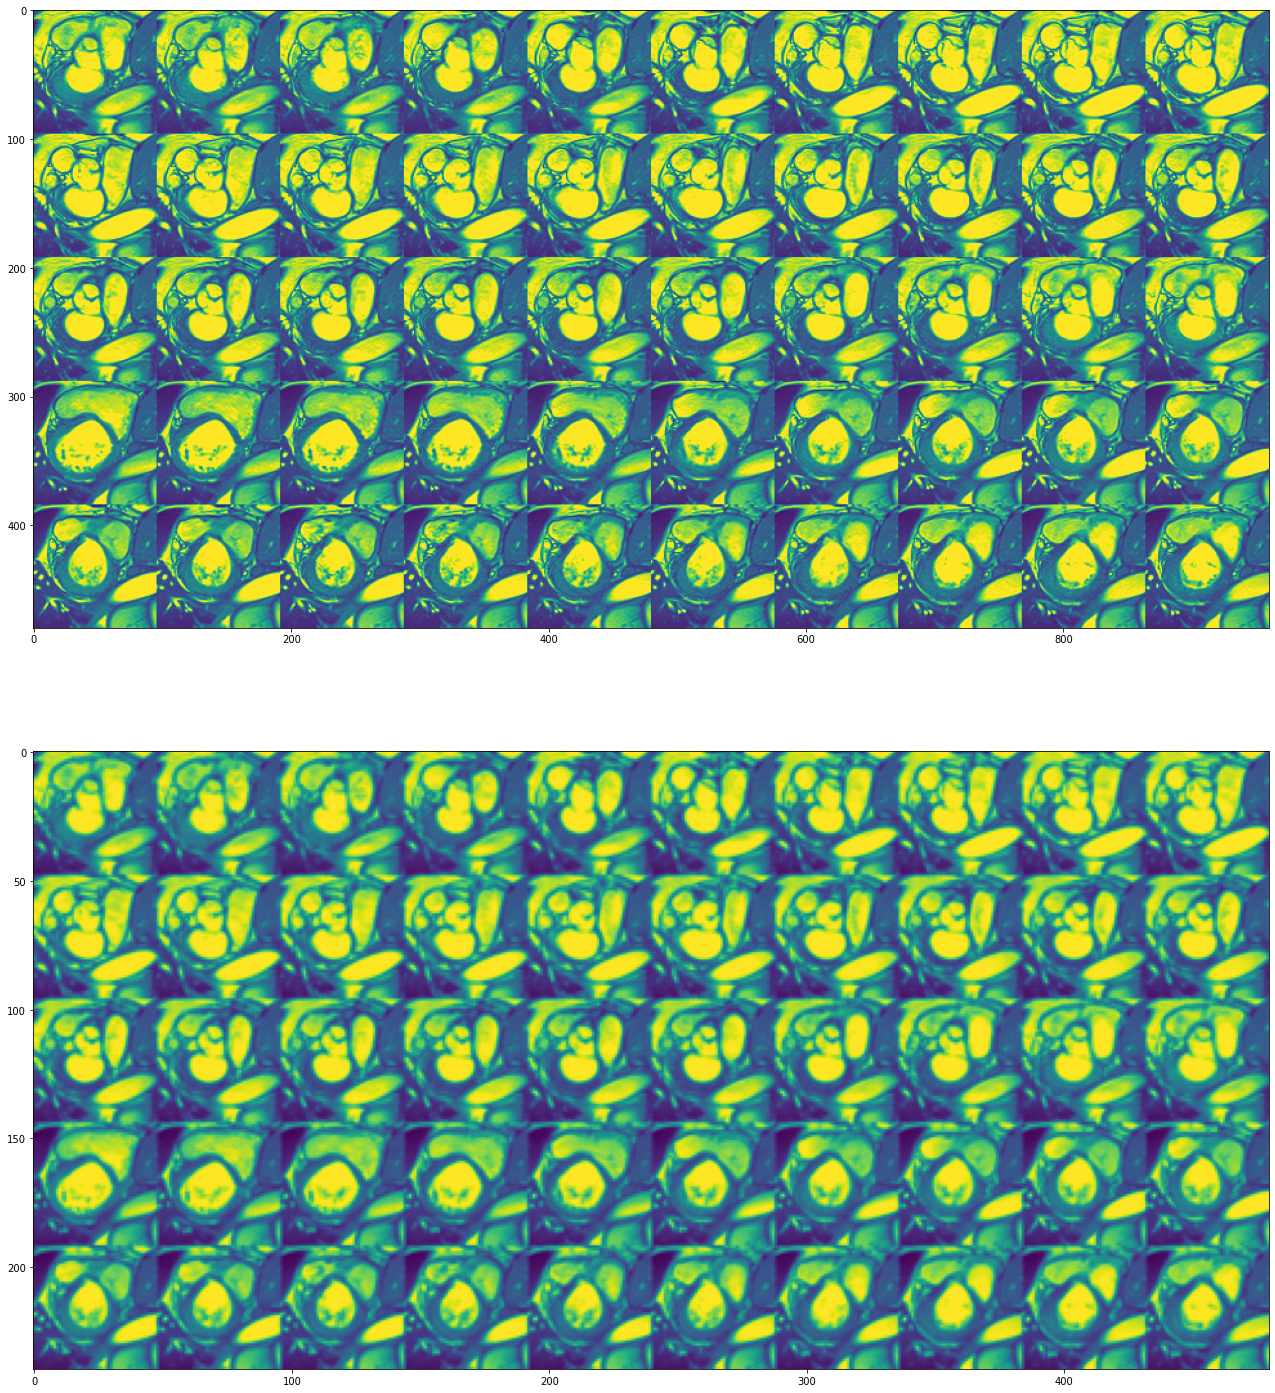

In [6]:
displayGrid=np.zeros((5*96,10*96)) #showing some example pictures and thier downscaled versions

for j in range(0,5):
  for k in range(0,10):
    displayGrid[j*96:(j+1)*96,k*96:(k+1)*96]=valid[j*10+k]
plt.figure(figsize=(30,25))
plt.subplot(2,1,1)
plt.imshow(displayGrid)
plt.subplot(2,1,2)
plt.imshow(cv2.pyrDown(displayGrid))
plt.grid(False)

plt.show()

In [7]:
 # The creation of the training dataset
train=[]

for elem in valid :
  train.append(cv2.pyrDown(elem)) # We halve the resolution of each image
train=np.asarray(train)


<function matplotlib.pyplot.show(*args, **kw)>

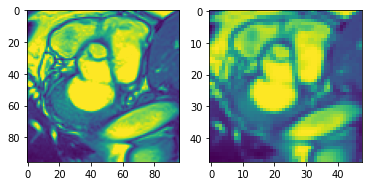

In [8]:
plt.subplot(1,2,1) # the difference between the training and validation datasets. The training dataset can be scaled diffrently, in this example trhe resolution is 1/4 of the original
plt.imshow(valid[0,:,:])
plt.subplot(1,2,2)
plt.imshow(train[0,:,:])
plt.show

In [9]:
from sklearn import preprocessing #standardizing the validation and training datasets
for i in range(0,24889):
  train[i,:,:]=preprocessing.scale(train[i,:,:])
  valid[i,:,:]=preprocessing.scale(valid[i,:,:])
  

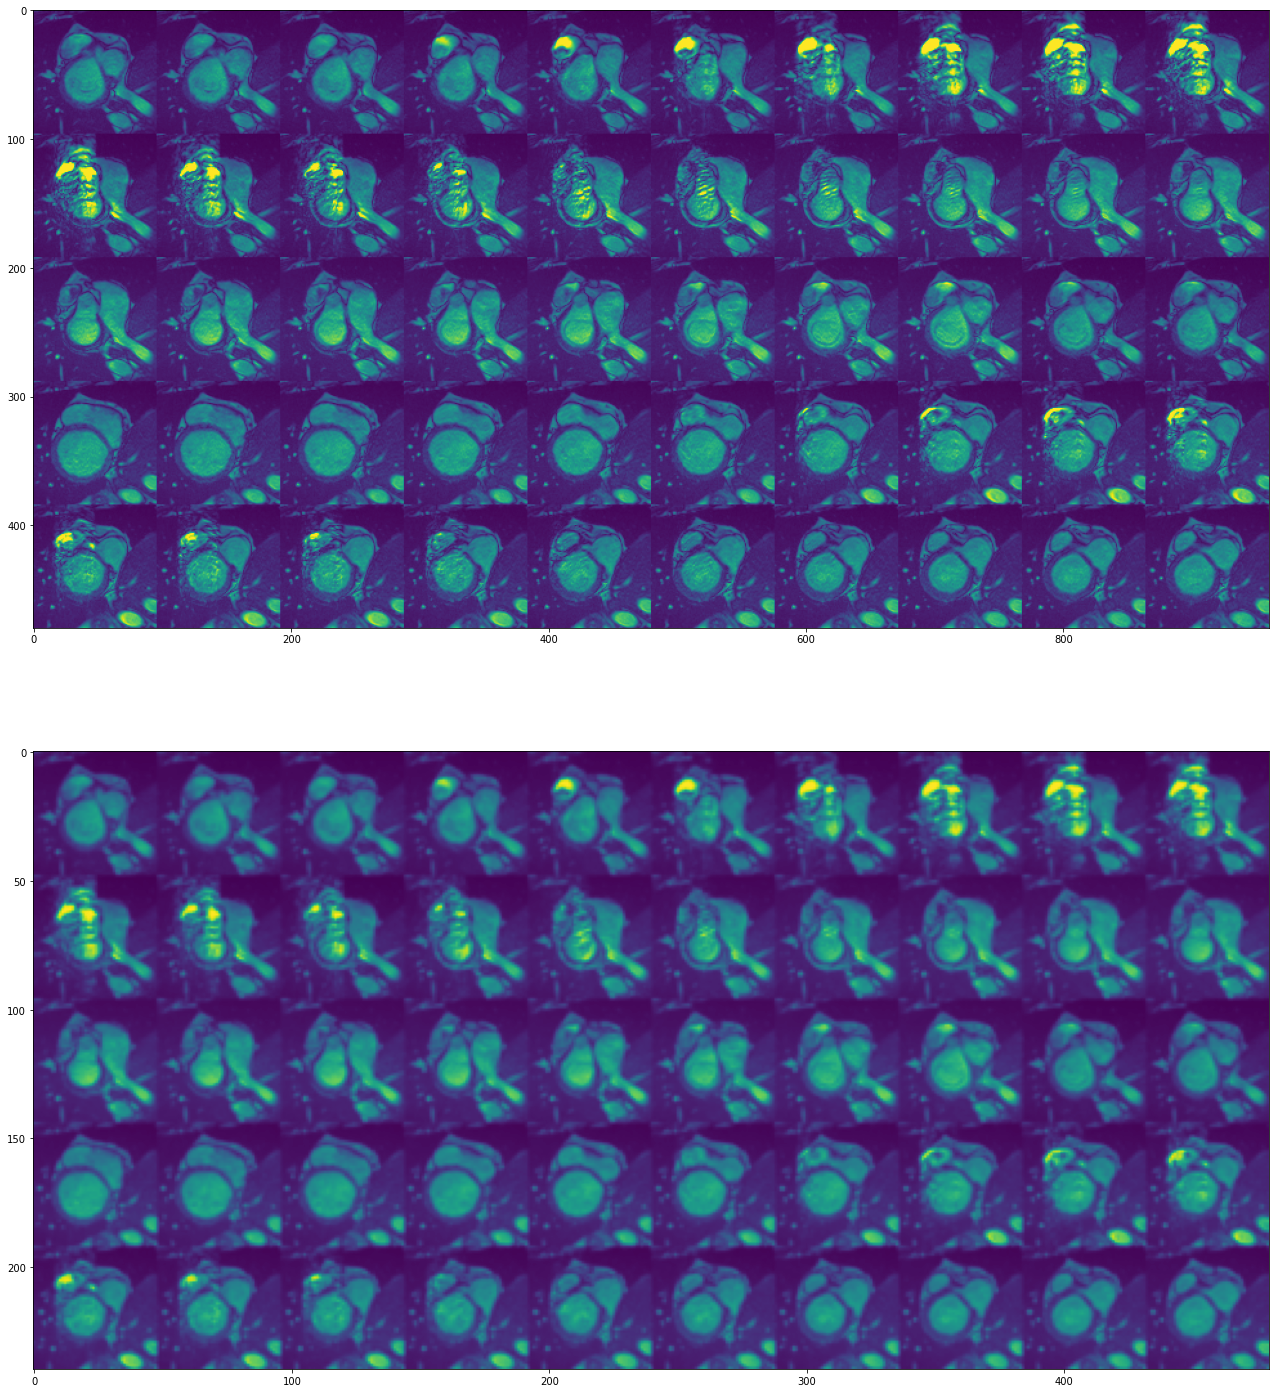

In [10]:
displayGrid=np.zeros((5*96,10*96))#showing some example pictures and thier downscaled versions

for j in range(0,5):
  for k in range(0,10):
    displayGrid[j*96:(j+1)*96,k*96:(k+1)*96]=test[j*10+k]
plt.figure(figsize=(30,25))
plt.subplot(2,1,1)
plt.imshow(displayGrid)
plt.subplot(2,1,2)
plt.imshow(cv2.pyrDown(displayGrid))
plt.grid(False)

plt.show()

In [11]:
testDownScaled=[] #Downscaling the testing dataset
for elem in test :
  testDownScaled.append(cv2.pyrDown(elem)) # We halve the resolution of each image
testDownScaled=np.asarray(testDownScaled)

In [12]:
for i in range(0,12995): # Standardizing the testing dataset
  testDownScaled[i,:,:]=preprocessing.scale(testDownScaled[i,:,:])
